In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, scale, LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, LSTM, Conv1D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('./data/pamap2.csv', index_col=0)

df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [3]:
X = df[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']]
y= df['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3'])
scaled_X['label'] = y.values

In [4]:
scaled_X.head(10)

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,label
0,1.045326,0.482125,0.795339,1.020984,0.515007,0.709843,-0.050077,-0.063520,0.010673,-0.512436,-2.315690,0.079981,1
1,1.037394,0.511525,0.645671,1.027347,0.538227,0.625688,-0.332105,-0.040984,-0.027302,-0.512858,-2.324611,0.054591,1
2,1.045173,0.462137,0.795477,1.041029,0.546666,0.755891,0.063629,-0.076888,0.011046,-0.490177,-2.311773,0.016526,1
3,1.073278,0.516997,0.817213,1.076369,0.588809,0.797656,-0.197698,-0.331183,-0.013566,-0.494530,-2.311705,0.035545,1
4,1.105348,0.620071,0.433665,1.077076,0.614042,0.406751,0.298940,-0.069269,-0.003524,-0.535720,-2.314257,0.074031,1
5,1.081223,0.531204,0.646790,1.058209,0.567687,0.663319,-0.376165,-0.065268,-0.042220,-0.518867,-2.268013,-0.051930,1
6,1.120882,0.335449,0.510746,1.155039,0.357123,0.344683,-0.605600,0.169430,-0.111813,-0.453055,-2.172559,-0.329564,1
7,1.108197,0.572129,0.913760,1.084189,0.701071,0.872792,-0.364258,0.256298,0.028632,-0.383153,-2.209168,-0.299540,1
8,1.058022,0.512381,0.880763,1.067211,0.527444,0.814750,0.284235,1.078637,0.202735,-0.389909,-2.105920,-0.468578,1
9,0.974848,0.429155,1.145449,0.919740,0.435393,1.092779,0.285924,1.336779,0.080749,-0.272784,-2.127417,-0.388505,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [6]:
X_train

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,label
47864,-0.479485,-0.174799,0.042034,-0.464264,-0.165517,0.060204,-0.056599,0.248808,0.051130,0.572234,0.119256,0.869617,3
45703,0.261713,0.313654,0.987217,0.259627,0.361579,0.959935,-0.089675,-0.055851,-0.012589,-0.464331,-0.349421,-0.069596,2
66679,-0.858558,0.377272,-0.036724,-0.774954,0.406513,-0.017305,-0.195096,-0.011921,-0.437046,0.917754,-0.429350,0.500471,4
93645,-0.573366,0.028828,-0.409800,-0.586197,0.034275,-0.377440,0.104479,-0.050521,-0.017719,0.419424,-0.024559,0.828166,3
84311,-0.762851,0.010583,-0.319177,-0.785703,0.014570,-0.208878,0.703273,0.835219,-0.669350,1.164987,1.035828,-0.027469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81968,0.255900,0.766390,1.676697,0.305897,0.778988,1.773236,-1.210262,0.485158,1.091411,1.517563,-0.897116,0.595671,13
8964,-1.368906,0.203247,0.482823,-1.292282,0.204861,0.438418,0.609778,-0.233970,-0.071505,1.675948,-0.760716,-0.474593,13
71480,-2.611455,2.640520,0.419192,-2.676609,2.506652,0.052955,1.188106,-0.485738,-2.707661,-0.654825,-1.246252,0.088377,5
70863,0.354227,0.511006,-0.621089,0.454356,0.514139,-0.583279,0.157134,-0.173622,-1.108253,0.920668,-0.340695,-0.144990,7


In [7]:
y_train

47864     3
45703     2
66679     4
93645     3
84311     4
         ..
81968    13
8964     13
71480     5
70863     7
80841    13
Name: label, Length: 94812, dtype: int64

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94812, 13), (23704, 13), (94812,), (23704,))

In [9]:
TIME_STEPS = 40
STEP = 10

In [10]:
from scipy import stats

def create_dataset(X, y, time_steps, step):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train, y_train = create_dataset(X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_train.label, TIME_STEPS, STEP)

X_test, y_test = create_dataset(X_test[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\adminastor\AppData\Local\Temp\ipykernel_25128\1707550704.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\adminastor\AppData\Local\Temp\ipykernel_25128\1707550704.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this war

(9478, 40, 12) (9478, 1)


In [11]:
X_train

array([[[-4.79484884e-01, -1.74799359e-01,  4.20339022e-02, ...,
          5.72233588e-01,  1.19255873e-01,  8.69616917e-01],
        [ 2.61713306e-01,  3.13654306e-01,  9.87217458e-01, ...,
         -4.64330625e-01, -3.49421094e-01, -6.95956537e-02],
        [-8.58558233e-01,  3.77271685e-01, -3.67244702e-02, ...,
          9.17753606e-01, -4.29349935e-01,  5.00471224e-01],
        ...,
        [-7.95369710e-01, -5.81571933e-01, -9.55472443e-01, ...,
          1.26641264e+00, -4.37548199e-01,  9.36608660e-01],
        [-4.74284183e-01, -1.41268629e-01, -2.88495353e-01, ...,
          6.60425281e-01,  1.98261353e-01,  6.46680683e-01],
        [ 9.58029442e-01,  4.56523743e-01,  5.05211899e-01, ...,
         -1.30773125e+00, -1.79402271e+00, -4.94655144e-01]],

       [[-1.01860982e+00,  1.12903322e-02, -5.82352681e-01, ...,
          7.73201052e-01,  1.00679141e+00,  8.79565133e-02],
        [-3.65569298e-01,  7.23381501e-02, -4.04141680e-01, ...,
          9.66880187e-01,  1.00480523e

In [12]:
y_train

array([[ 3],
       [ 3],
       [ 3],
       ...,
       [ 4],
       [ 4],
       [13]], dtype=int64)

In [13]:
enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [14]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (9478, 40, 12)
X_test.shape  (2367, 40, 12)
y_train.shape  (9478, 8)
y_test.shape  (2367, 8)


In [16]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [17]:
n_timesteps, n_features, n_outputs

(40, 12, 8)

In [18]:
model = Sequential()
model.add(LSTM(64, input_shape=[n_timesteps, n_features], return_sequences = True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 127,304
Trainable params: 127,304
Non-trai

In [19]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/10
267/267 [==============================] - 13s 37ms/step - loss: 1.6296 - accuracy: 0.3692 - val_loss: 1.5363 - val_accuracy: 0.4293
Epoch 2/10
267/267 [==============================] - 9s 34ms/step - loss: 1.5296 - accuracy: 0.4149 - val_loss: 1.5031 - val_accuracy: 0.4420
Epoch 3/10
267/267 [==============================] - 9s 34ms/step - loss: 1.4588 - accuracy: 0.4471 - val_loss: 1.4602 - val_accuracy: 0.4610
Epoch 4/10
267/267 [==============================] - 9s 34ms/step - loss: 1.4254 - accuracy: 0.4587 - val_loss: 1.4534 - val_accuracy: 0.4409
Epoch 5/10
267/267 [==============================] - 9s 35ms/step - loss: 1.3987 - accuracy: 0.4730 - val_loss: 1.4224 - val_accuracy: 0.4536
Epoch 6/10
267/267 [==============================] - 10s 38ms/step - loss: 1.3653 - accuracy: 0.4882 - val_loss: 1.4421 - val_accuracy: 0.4494
Epoch 7/10
267/267 [==============================] - 10s 37ms/step - loss: 1.3415 - accuracy: 0.4972 - val_loss: 1.4460 - val_accuracy: 0.4

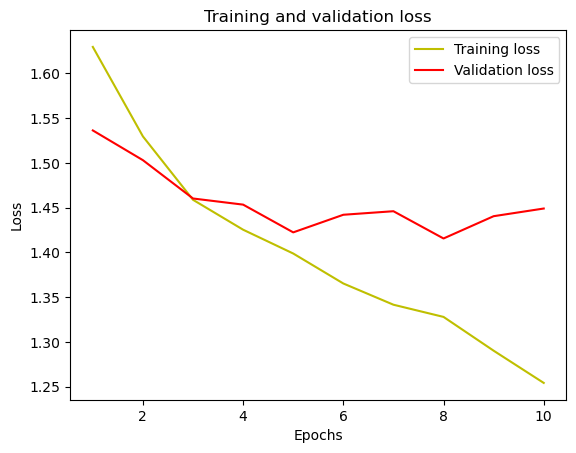

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

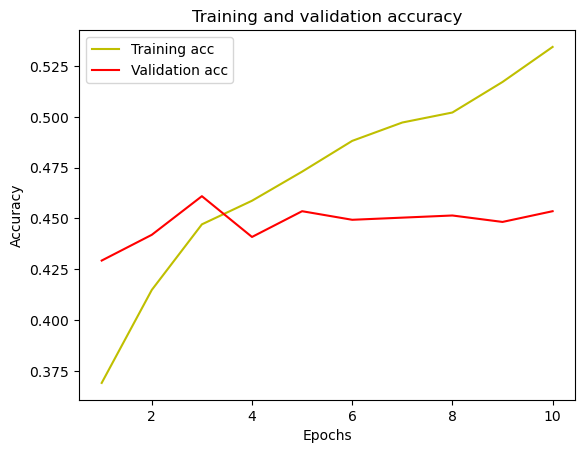

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

74/74 [==============================] - 2s 13ms/step


In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

74/74 [==============================] - 1s 13ms/step
Confusion Matrix
[[355  50   1  36   0   5   0   0]
 [ 66 270   8  72   0  23   0   0]
 [ 90 101  25 153   0  28   0   0]
 [150 109  15 432   0  45   0   0]
 [  2   1   0   2   0   0   0   0]
 [ 44  87   4  89   0  66   0   0]
 [  5   2   1   9   0   0   0   0]
 [  7   7   0   6   0   1   0   0]]


In [25]:
print(X_train.shape,y_test.shape)
base_loss,base_accuracy=model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

cnn_file='./data/CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

(9478, 40, 12) (2367, 8)
74/74 [==============================] - 1s 13ms/step - loss: 1.3616 - accuracy: 0.4850
model saved at  ./data/CNN_Model.h5
Accuracy >48.500210
Base Loss >1.36


## Tuning

In [26]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [39]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 5

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(8, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.Adam(lr=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  6


C:\Users\adminastor\anaconda3\envs\homl3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [40]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm,False
1,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm_1,False
2,<keras.layers.regularization.dropout.Dropout o...,dropout,False
3,<keras.layers.core.dense.Dense object at 0x000...,dense,False
4,<keras.layers.regularization.dropout.Dropout o...,dropout_1,False
5,<keras.layers.core.dense.Dense object at 0x000...,dense_1,True


In [41]:
history2 = new_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
267/267 [==============================] - 7s 17ms/step - loss: 1.5305 - accuracy: 0.4215 - val_loss: 1.3927 - val_accuracy: 0.4641
Epoch 2/10
267/267 [==============================] - 4s 15ms/step - loss: 1.2549 - accuracy: 0.5448 - val_loss: 1.4039 - val_accuracy: 0.4684
Epoch 3/10
267/267 [==============================] - 4s 15ms/step - loss: 1.2195 - accuracy: 0.5555 - val_loss: 1.4160 - val_accuracy: 0.4652
Epoch 4/10
267/267 [==============================] - 5s 17ms/step - loss: 1.1991 - accuracy: 0.5606 - val_loss: 1.4184 - val_accuracy: 0.4641
Epoch 5/10
267/267 [==============================] - 4s 15ms/step - loss: 1.1883 - accuracy: 0.5653 - val_loss: 1.4224 - val_accuracy: 0.4694
Epoch 6/10
267/267 [==============================] - 4s 15ms/step - loss: 1.1810 - accuracy: 0.5668 - val_loss: 1.4197 - val_accuracy: 0.4610
Epoch 7/10
267/267 [==============================] - 4s 15ms/step - loss: 1.1791 - accuracy: 0.5683 - val_loss: 1.4220 - val_accuracy: 0.4652

## 미세조정

In [42]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.Adam(lr=1e-3),
                     metrics=["accuracy"])

C:\Users\adminastor\anaconda3\envs\homl3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [43]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm,True
1,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm_1,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense,True
4,<keras.layers.regularization.dropout.Dropout o...,dropout_1,True
5,<keras.layers.core.dense.Dense object at 0x000...,dense_1,True


In [44]:
history2 = new_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
267/267 [==============================] - 13s 37ms/step - loss: 1.2245 - accuracy: 0.5495 - val_loss: 1.4080 - val_accuracy: 0.4515
Epoch 2/10
267/267 [==============================] - 9s 35ms/step - loss: 1.1793 - accuracy: 0.5661 - val_loss: 1.4256 - val_accuracy: 0.4578
Epoch 3/10
267/267 [==============================] - 9s 35ms/step - loss: 1.1581 - accuracy: 0.5783 - val_loss: 1.4815 - val_accuracy: 0.4673
Epoch 4/10
267/267 [==============================] - 10s 36ms/step - loss: 1.1242 - accuracy: 0.5974 - val_loss: 1.4547 - val_accuracy: 0.4536
Epoch 5/10
267/267 [==============================] - 10s 37ms/step - loss: 1.1003 - accuracy: 0.6009 - val_loss: 1.4931 - val_accuracy: 0.4283
Epoch 6/10
267/267 [==============================] - 10s 37ms/step - loss: 1.0716 - accuracy: 0.6196 - val_loss: 1.5256 - val_accuracy: 0.4778
Epoch 7/10
267/267 [==============================] - 10s 37ms/step - loss: 1.0335 - accuracy: 0.6280 - val_loss: 1.4868 - val_accuracy: 0

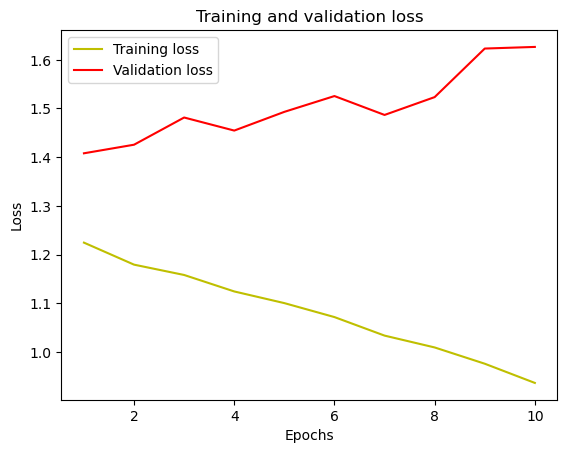

In [45]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

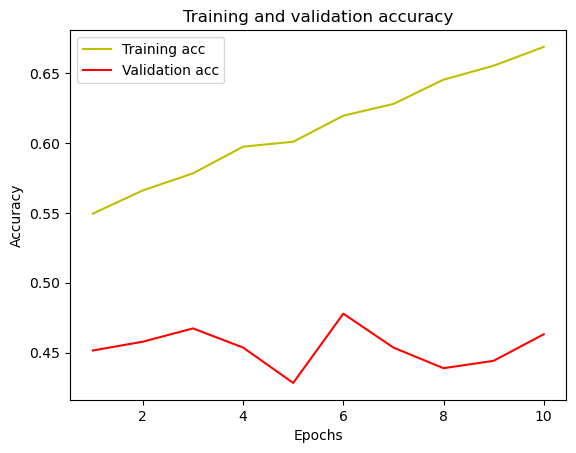

In [46]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
new_model.evaluate(X_test, y_test)
y_pred = new_model.predict(X_test)

74/74 [==============================] - 2s 15ms/step
